In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [98]:
def get_data(sample_num=2000):
    observed_r = np.random.uniform(low=0, high=5, size=(sample_num,)) # observed_r
    predicted_r = np.random.uniform(low=0, high=5, size=(sample_num,)) # predicted rating
    imputed_e = np.power((predicted_r - 0.5), 2)*0.3 ## e_hat_ui = 7*(r_ui - 5)^2
    
    observed_e = predicted_r - observed_r # e_ui
    propensities = np.random.uniform(low=0, high=1, size=(sample_num,)) # propensities for observed X_ui
   
    return observed_r, predicted_r, imputed_e, observed_e, propensities

In [99]:
get_data()

(array([1.69869252, 4.32719075, 4.41498194, ..., 0.30308346, 1.19902313,
        2.65493588]),
 array([0.58589618, 2.67536863, 4.05944089, ..., 4.88281051, 0.63120312,
        1.2423625 ]),
 array([2.21344598e-03, 1.41966861e+00, 3.80088584e+00, ...,
        5.76270838e+00, 5.16427778e-03, 1.65330623e-01]),
 array([-1.11279635, -1.65182212, -0.35554104, ...,  4.57972705,
        -0.56782   , -1.41257338]),
 array([0.52466091, 0.91450814, 0.31854313, ..., 0.84216456, 0.27657348,
        0.88789906]))

In [121]:
def SGD(predicted_r,
        imputed_e,
        observed_e,
        propensities,
        step_size=2,
        max_iter_count=2000):

    m = predicted_r.shape[0]
    var = 1
    theta = np.zeros(2)
    imputed_e = imputed_e.flatten()
    loss = 1
    iter_count = 0
    iter_list = []
    loss_list = []
    theta1 = []
    theta2 = []

    while loss > 0.01 and iter_count < max_iter_count:
        loss = 0
        theta = [1,2]
        theta1.append(theta[0])
        theta2.append(theta[1])
        rand1 = np.random.randint(0, m, 1)

        gradient = 4 * (theta[0] * predicted_r[rand1] - 2 * theta[0] *
                        theta[1] * predicted_r[rand1] + theta[1]**2 -
                        observed_e[rand1]) * (theta[0] * predicted_r[rand1] -
                                              theta[0] * theta[1]) / propensities[rand1]

        for i in range(len(theta)):
            theta[i] = theta[i] - step_size * gradient 
        h = np.power((predicted_r - theta[1]), 2) * theta[0]
        for i in range(m):
            every_loss = np.power((h[i] - observed_e[i]), 2) / propensities[i]
            loss = loss + every_loss

        print("iter_count: ", iter_count, "the loss:", loss, "the gradient:", gradient)

        iter_list.append(iter_count)
        loss_list.append(loss)

        iter_count += 1

    plt.plot(iter_list, loss_list)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.show()
    return theta1, theta2, theta, loss_list

iter_count:  0 the loss: 217425.99069123453 the gradient: [1.88796568]
iter_count:  1 the loss: 241175.13272269416 the gradient: [-64.81255636]
iter_count:  2 the loss: 225130.0073762092 the gradient: [-20.71967914]
iter_count:  3 the loss: 240950.51131308306 the gradient: [-64.22155992]
iter_count:  4 the loss: 235858.1468855407 the gradient: [-50.62852886]
iter_count:  5 the loss: 247516.30727664553 the gradient: [-81.20650295]
iter_count:  6 the loss: 216959.80778292308 the gradient: [3.28771335]
iter_count:  7 the loss: 218807.65119956608 the gradient: [-2.23898722]
iter_count:  8 the loss: 223330.47164671888 the gradient: [-15.52604742]
iter_count:  9 the loss: 524544.6132096569 the gradient: [-502.21138026]
iter_count:  10 the loss: 228697.98417801334 the gradient: [-30.86437729]
iter_count:  11 the loss: 217531.32699133593 the gradient: [1.57219629]
iter_count:  12 the loss: 2251395.5204473822 the gradient: [-1209.20352333]
iter_count:  13 the loss: 220506.66833846082 the gradie

iter_count:  145 the loss: 276994.2062296876 the gradient: [-150.72769857]
iter_count:  146 the loss: 293517.82762273407 the gradient: [-185.51912557]
iter_count:  147 the loss: 218687.09902644766 the gradient: [-1.88018369]
iter_count:  148 the loss: 242268.04176646488 the gradient: [-67.677909]
iter_count:  149 the loss: 363987.728772081 the gradient: [-309.00324767]
iter_count:  150 the loss: 405308.3444990515 the gradient: [-367.7044143]
iter_count:  151 the loss: 26759627852.15617 the gradient: [-10646.14143015]
iter_count:  152 the loss: 218227.96745687997 the gradient: [-0.51141825]
iter_count:  153 the loss: 26759627852.15617 the gradient: [-10646.14143015]
iter_count:  154 the loss: 230036.99268657708 the gradient: [-34.61996764]
iter_count:  155 the loss: 247701.23462681822 the gradient: [-81.6763378]
iter_count:  156 the loss: 234012.6864880555 the gradient: [-45.60867019]
iter_count:  157 the loss: 321878.5069203417 the gradient: [-239.51402744]
iter_count:  158 the loss: 4

iter_count:  255 the loss: 218069.69930300963 the gradient: [-0.03876584]
iter_count:  256 the loss: 5043799.331122604 the gradient: [-1623.56964939]
iter_count:  257 the loss: 219783.0620686294 the gradient: [-5.13318516]
iter_count:  258 the loss: 246847.06788315423 the gradient: [-79.50234927]
iter_count:  259 the loss: 218367.6288862898 the gradient: [-0.92815296]
iter_count:  260 the loss: 226972.8137497631 the gradient: [-25.98440402]
iter_count:  261 the loss: 217980.07291886854 the gradient: [0.22908195]
iter_count:  262 the loss: 475742.0227813397 the gradient: [-452.17405971]
iter_count:  263 the loss: 223376.43587787318 the gradient: [-15.65935623]
iter_count:  264 the loss: 237484.1696642569 the gradient: [-55.00977472]
iter_count:  265 the loss: 217468.7142571332 the gradient: [1.75986948]
iter_count:  266 the loss: 263353.59286204126 the gradient: [-119.84466257]
iter_count:  267 the loss: 220132.7175974002 the gradient: [-6.1668023]
iter_count:  268 the loss: 236603.6299

iter_count:  400 the loss: 248424.94718194587 the gradient: [-83.51062066]
iter_count:  401 the loss: 8099689.491293081 the gradient: [-1885.64357426]
iter_count:  402 the loss: 317489.14576155675 the gradient: [-231.58139463]
iter_count:  403 the loss: 270728.3596413191 the gradient: [-136.7996445]
iter_count:  404 the loss: 267346.783174317 the gradient: [-129.10265999]
iter_count:  405 the loss: 221737.55788586082 the gradient: [-10.88488162]
iter_count:  406 the loss: 244459.60336583154 the gradient: [-73.37327369]
iter_count:  407 the loss: 223470.99654618138 the gradient: [-15.9335001]
iter_count:  408 the loss: 261320.75436348756 the gradient: [-115.05955007]
iter_count:  409 the loss: 505966.83353800146 the gradient: [-483.8462288]
iter_count:  410 the loss: 290144.22856705525 the gradient: [-178.63233591]
iter_count:  411 the loss: 589065074139.5171 the gradient: [-18208.78125505]
iter_count:  412 the loss: 224185.4066978224 the gradient: [-17.99998772]
iter_count:  413 the lo

iter_count:  546 the loss: 228133.82322828865 the gradient: [-29.27368155]
iter_count:  547 the loss: 214033.25640910064 the gradient: [12.15975969]
iter_count:  548 the loss: 218851.24245540163 the gradient: [-2.36866931]
iter_count:  549 the loss: 338841.51069469366 the gradient: [-268.87167033]
iter_count:  550 the loss: 4769699.731385006 the gradient: [-1593.66157236]
iter_count:  551 the loss: 294742.20925341226 the gradient: [-187.99237169]
iter_count:  552 the loss: 237884.8660237041 the gradient: [-56.08349157]
iter_count:  553 the loss: 223274.72316464342 the gradient: [-15.36431557]
iter_count:  554 the loss: 227369.7732433235 the gradient: [-27.11142581]
iter_count:  555 the loss: 293410.0511783301 the gradient: [-185.30075577]
iter_count:  556 the loss: 232431.4369553565 the gradient: [-41.26692099]
iter_count:  557 the loss: 402836.6469981112 the gradient: [-364.41210831]
iter_count:  558 the loss: 221106.785626483 the gradient: [-9.03554568]
iter_count:  559 the loss: 239

iter_count:  692 the loss: 241506.35318995695 the gradient: [-65.6827195]
iter_count:  693 the loss: 627065.896547244 the gradient: [-591.5271747]
iter_count:  694 the loss: 287004.28366867936 the gradient: [-172.12540992]
iter_count:  695 the loss: 214924.21859029628 the gradient: [9.4431545]
iter_count:  696 the loss: 226099.8794509667 the gradient: [-23.49725118]
iter_count:  697 the loss: 238120.23440912197 the gradient: [-56.71310222]
iter_count:  698 the loss: 220427.023752362 the gradient: [-7.03522575]
iter_count:  699 the loss: 225408.8880037575 the gradient: [-21.51989226]
iter_count:  700 the loss: 222860.76206808453 the gradient: [-14.16179236]
iter_count:  701 the loss: 228317.19527367793 the gradient: [-29.79125952]
iter_count:  702 the loss: 228189.27613203684 the gradient: [-29.43025607]
iter_count:  703 the loss: 229137.97172408042 the gradient: [-32.10150751]
iter_count:  704 the loss: 223814.84244160907 the gradient: [-16.9291325]
iter_count:  705 the loss: 222487.21

iter_count:  836 the loss: 317067.5809526963 the gradient: [-230.81184501]
iter_count:  837 the loss: 222272.49549397934 the gradient: [-12.44811935]
iter_count:  838 the loss: 266329.6182249174 the gradient: [-126.76198751]
iter_count:  839 the loss: 229329.96411122935 the gradient: [-32.64039569]
iter_count:  840 the loss: 265825.71321409766 the gradient: [-125.59799631]
iter_count:  841 the loss: 219774.06129094306 the gradient: [-5.10655107]
iter_count:  842 the loss: 222958.15341057503 the gradient: [-14.4449572]
iter_count:  843 the loss: 250748.83195038966 the gradient: [-89.35348473]
iter_count:  844 the loss: 322884.8496235057 the gradient: [-241.31247203]
iter_count:  845 the loss: 289255.6801289565 the gradient: [-176.80060013]
iter_count:  846 the loss: 244729.71744890945 the gradient: [-74.07062635]
iter_count:  847 the loss: 218925.95085880277 the gradient: [-2.59084945]
iter_count:  848 the loss: 304684.4178399133 the gradient: [-207.57895239]
iter_count:  849 the loss: 

iter_count:  981 the loss: 217315.56571992542 the gradient: [2.21919135]
iter_count:  982 the loss: 481004.9729514367 the gradient: [-457.86060921]
iter_count:  983 the loss: 229919.5827892532 the gradient: [-34.29177378]
iter_count:  984 the loss: 218486.27547972344 the gradient: [-1.28192373]
iter_count:  985 the loss: 232088.62207697707 the gradient: [-40.32064259]
iter_count:  986 the loss: 293675.9436011027 the gradient: [-185.83929579]
iter_count:  987 the loss: 262359.0863737803 the gradient: [-117.50984679]
iter_count:  988 the loss: 246519.67406699975 the gradient: [-78.66646582]
iter_count:  989 the loss: 239688.8116660463 the gradient: [-60.88858604]
iter_count:  990 the loss: 251509.74262962633 the gradient: [-91.25115648]
iter_count:  991 the loss: 233822.29203731145 the gradient: [-45.08788395]
iter_count:  992 the loss: 224023.98838225278 the gradient: [-17.53379449]
iter_count:  993 the loss: 271027.5348482586 the gradient: [-137.47442954]
iter_count:  994 the loss: 290

iter_count:  1091 the loss: 264403.5530857163 the gradient: [-122.29697042]
iter_count:  1092 the loss: 234282.4964185293 the gradient: [-46.34575151]
iter_count:  1093 the loss: 220795.83317850527 the gradient: [-8.12146168]
iter_count:  1094 the loss: 283184.3359020369 the gradient: [-164.0794922]
iter_count:  1095 the loss: 232985.6682032304 the gradient: [-42.79300696]
iter_count:  1096 the loss: 534462.2959937234 the gradient: [-511.70324597]
iter_count:  1097 the loss: 216474.60889776907 the gradient: [4.74848118]
iter_count:  1098 the loss: 224633.63308484427 the gradient: [-19.29230929]
iter_count:  1099 the loss: 234951.38145726765 the gradient: [-48.16835766]
iter_count:  1100 the loss: 292060.94000377995 the gradient: [-182.55814692]
iter_count:  1101 the loss: 1562523.2696235296 the gradient: [-1031.21259334]
iter_count:  1102 the loss: 221789.95198985448 the gradient: [-11.03819931]
iter_count:  1103 the loss: 230626.21917692752 the gradient: [-36.26380961]
iter_count:  11

iter_count:  1199 the loss: 230434.87349534174 the gradient: [-35.73057428]
iter_count:  1200 the loss: 240427.07375753138 the gradient: [-62.84157416]
iter_count:  1201 the loss: 237336.74605094918 the gradient: [-54.61414548]
iter_count:  1202 the loss: 306090.96805672534 the gradient: [-210.28085855]
iter_count:  1203 the loss: 225801.03585189377 the gradient: [-22.64300745]
iter_count:  1204 the loss: 475896.3765811493 the gradient: [-452.34192051]
iter_count:  1205 the loss: 222577.3440971137 the gradient: [-13.3368761]
iter_count:  1206 the loss: 304092.99573518574 the gradient: [-206.43787676]
iter_count:  1207 the loss: 356434.5986145424 the gradient: [-297.33966151]
iter_count:  1208 the loss: 280885.67796943604 the gradient: [-159.16743039]
iter_count:  1209 the loss: 6529299.201242425 the gradient: [-1764.43856667]
iter_count:  1210 the loss: 243260.86146449533 the gradient: [-70.26630584]
iter_count:  1211 the loss: 308317.96935793734 the gradient: [-214.52503917]
iter_coun

iter_count:  1309 the loss: 4174848.022497596 the gradient: [-1523.1571136]
iter_count:  1310 the loss: 220427.023752362 the gradient: [-7.03522575]
iter_count:  1311 the loss: 272009.9914716079 the gradient: [-139.68336474]
iter_count:  1312 the loss: 266718.4116699042 the gradient: [-127.65807342]
iter_count:  1313 the loss: 225744.1494153763 the gradient: [-22.48023642]
iter_count:  1314 the loss: 228519.50604523864 the gradient: [-30.36168249]
iter_count:  1315 the loss: 220414.13137682385 the gradient: [-6.99721371]
iter_count:  1316 the loss: 218771.12620509084 the gradient: [-2.13030239]
iter_count:  1317 the loss: 1179191.52402459 the gradient: [-896.21672911]
iter_count:  1318 the loss: 250107.1821626928 the gradient: [-87.74734297]
iter_count:  1319 the loss: 232758.95257818355 the gradient: [-42.16930324]
iter_count:  1320 the loss: 226785.79674807817 the gradient: [-25.45257447]
iter_count:  1321 the loss: 219756.00213614522 the gradient: [-5.05310839]
iter_count:  1322 the

iter_count:  1418 the loss: 527674.174099224 the gradient: [-505.22925764]
iter_count:  1419 the loss: 218011.35539358 the gradient: [0.13557911]
iter_count:  1420 the loss: 229410.49192058278 the gradient: [-32.8662523]
iter_count:  1421 the loss: 225461.63346962814 the gradient: [-21.67109881]
iter_count:  1422 the loss: 290144.22856705525 the gradient: [-178.63233591]
iter_count:  1423 the loss: 220282.96461323698 the gradient: [-6.61032316]
iter_count:  1424 the loss: 327692.4419019161 the gradient: [-249.80255562]
iter_count:  1425 the loss: 238958.75448111453 the gradient: [-58.94962012]
iter_count:  1426 the loss: 218154.19463740085 the gradient: [-0.29115546]
iter_count:  1427 the loss: 217060.20315910716 the gradient: [2.98595732]
iter_count:  1428 the loss: 239364.4667854281 the gradient: [-60.02810113]
iter_count:  1429 the loss: 230920.17745601444 the gradient: [-37.08190522]
iter_count:  1430 the loss: 236334.11375390762 the gradient: [-51.9150215]
iter_count:  1431 the lo

iter_count:  1527 the loss: 404132.2201440666 the gradient: [-366.14099842]
iter_count:  1528 the loss: 402532.2530695383 the gradient: [-364.00488329]
iter_count:  1529 the loss: 241513.01327624096 the gradient: [-65.70020058]
iter_count:  1530 the loss: 256050.91920183843 the gradient: [-102.42126925]
iter_count:  1531 the loss: 268276.5446350806 the gradient: [-131.23183637]
iter_count:  1532 the loss: 245272.31522660833 the gradient: [-75.46841529]
iter_count:  1533 the loss: 216288.86271532575 the gradient: [5.3087614]
iter_count:  1534 the loss: 225130.0073762092 the gradient: [-20.71967914]
iter_count:  1535 the loss: 1013600.3888655865 the gradient: [-823.88701733]
iter_count:  1536 the loss: 262727.1321384655 the gradient: [-118.3752827]
iter_count:  1537 the loss: 218568.50536978856 the gradient: [-1.52697123]
iter_count:  1538 the loss: 220276.70735255454 the gradient: [-6.59185955]
iter_count:  1539 the loss: 257664.55971842483 the gradient: [-106.32752051]
iter_count:  154

iter_count:  1636 the loss: 277104.39211192273 the gradient: [-150.96884668]
iter_count:  1637 the loss: 241533.66433670354 the gradient: [-65.75440053]
iter_count:  1638 the loss: 218286.21194813336 the gradient: [-0.68525349]
iter_count:  1639 the loss: 384825.43584867695 the gradient: [-339.61784753]
iter_count:  1640 the loss: 324137.6299780924 the gradient: [-243.5409463]
iter_count:  1641 the loss: 268904.6852984589 the gradient: [-132.6647296]
iter_count:  1642 the loss: 268984.5038842488 the gradient: [-132.8464892]
iter_count:  1643 the loss: 218119.41233555987 the gradient: [-0.18727445]
iter_count:  1644 the loss: 218568.50536978856 the gradient: [-1.52697123]
iter_count:  1645 the loss: 228663.9900862979 the gradient: [-30.76866916]
iter_count:  1646 the loss: 221915.360186315 the gradient: [-11.40499062]
iter_count:  1647 the loss: 523888.8419360141 the gradient: [-501.57631694]
iter_count:  1648 the loss: 236380.33354224084 the gradient: [-52.03977133]
iter_count:  1649 t

iter_count:  1745 the loss: 259977.72207665438 the gradient: [-111.87095414]
iter_count:  1746 the loss: 1679230094.7006364 the gradient: [-6417.15702308]
iter_count:  1747 the loss: 283957.7088606979 the gradient: [-165.7201387]
iter_count:  1748 the loss: 233406.62914207115 the gradient: [-43.94902908]
iter_count:  1749 the loss: 279367.69589348644 the gradient: [-155.89399836]
iter_count:  1750 the loss: 286292.04380726314 the gradient: [-170.63614705]
iter_count:  1751 the loss: 254232.86867146788 the gradient: [-97.98097832]
iter_count:  1752 the loss: 231952.26716377868 the gradient: [-39.94376291]
iter_count:  1753 the loss: 286316.511285504 the gradient: [-170.68738981]
iter_count:  1754 the loss: 225893.51965629534 the gradient: [-22.90752425]
iter_count:  1755 the loss: 218747.77824672748 the gradient: [-2.06081581]
iter_count:  1756 the loss: 230270.4313432263 the gradient: [-35.27186218]
iter_count:  1757 the loss: 256444.18343527341 the gradient: [-103.37626925]
iter_count

iter_count:  1854 the loss: 238497.62447116125 the gradient: [-57.72094353]
iter_count:  1855 the loss: 229068.47345664224 the gradient: [-31.90629704]
iter_count:  1856 the loss: 254472.31070846797 the gradient: [-98.56817257]
iter_count:  1857 the loss: 276764.93322648277 the gradient: [-150.22550974]
iter_count:  1858 the loss: 217778.14390431903 the gradient: [0.83304228]
iter_count:  1859 the loss: 266742.42638948397 the gradient: [-127.71336512]
iter_count:  1860 the loss: 469298.41556391853 the gradient: [-445.10696675]
iter_count:  1861 the loss: 594351516.3098754 the gradient: [-5241.11687141]
iter_count:  1862 the loss: 239040.5619570974 the gradient: [-59.16727487]
iter_count:  1863 the loss: 594351516.3098754 the gradient: [-5241.11687141]
iter_count:  1864 the loss: 222395.0345579289 the gradient: [-12.80555284]
iter_count:  1865 the loss: 286282.7208386156 the gradient: [-170.61662021]
iter_count:  1866 the loss: 235868.17778414127 the gradient: [-50.65567589]
iter_count:

iter_count:  1963 the loss: 217046.01717461649 the gradient: [3.02858541]
iter_count:  1964 the loss: 224438.3816510503 the gradient: [-18.72976038]
iter_count:  1965 the loss: 217596.61855714076 the gradient: [1.37656437]
iter_count:  1966 the loss: 225839.8322816341 the gradient: [-22.75398735]
iter_count:  1967 the loss: 300029.55115680187 the gradient: [-198.51686016]
iter_count:  1968 the loss: 213637.53437285055 the gradient: [13.37075365]
iter_count:  1969 the loss: 233641.21487880722 the gradient: [-44.59207856]
iter_count:  1970 the loss: 456992.2995254459 the gradient: [-431.2754276]
iter_count:  1971 the loss: 281904.4412324289 the gradient: [-161.35107162]
iter_count:  1972 the loss: 229425.616728159 the gradient: [-32.90866167]
iter_count:  1973 the loss: 308625.6394230784 the gradient: [-215.10817077]
iter_count:  1974 the loss: 228476.62185564465 the gradient: [-30.24082233]
iter_count:  1975 the loss: 234356.26500959444 the gradient: [-46.54708691]
iter_count:  1976 the

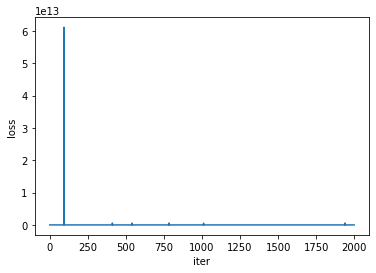

[array([1.01130013]), array([2.01130013])]


In [122]:
if __name__ == '__main__':
    observed_r, predicted_r, imputed_e, observed_e, propensities = get_data()
    theta1,theta2,theta,loss_list = SGD(predicted_r, imputed_e, observed_e, propensities, step_size = 0.001)
    print(theta)